In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import pandas as pd
from astropy.io import ascii
import scipy.stats as stats
import requests
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
cfpTableBerger = pd.read_csv("cfpTable_Berger2018.csv")
cfpTable = pd.read_csv("cfpTable.csv")


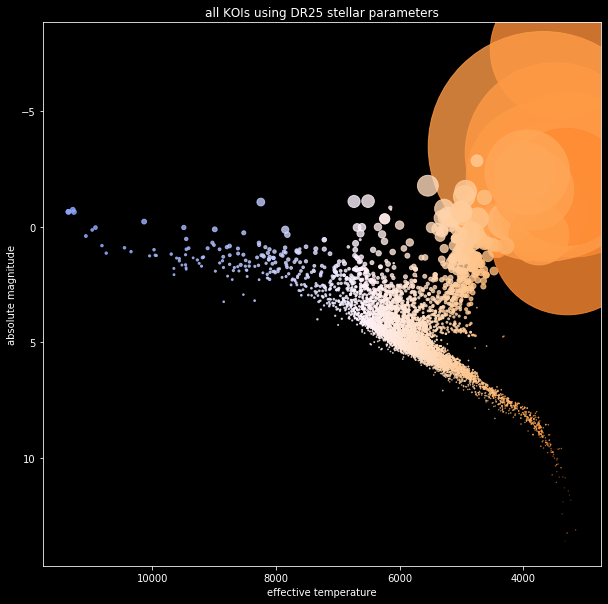

In [3]:
plt.style.use("dark_background")

plt.figure(figsize=(10,10))
plt.scatter(cfpTable.teff, cfpTable.absoluteKepmag, alpha=0.8, 
            c = np.transpose([cfpTable["teffR"],cfpTable["teffG"],cfpTable["teffB"]]), 
            s = cfpTable["radius"]**2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
xl = plt.xlim()
yl = plt.ylim()
plt.title('all KOIs using DR25 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

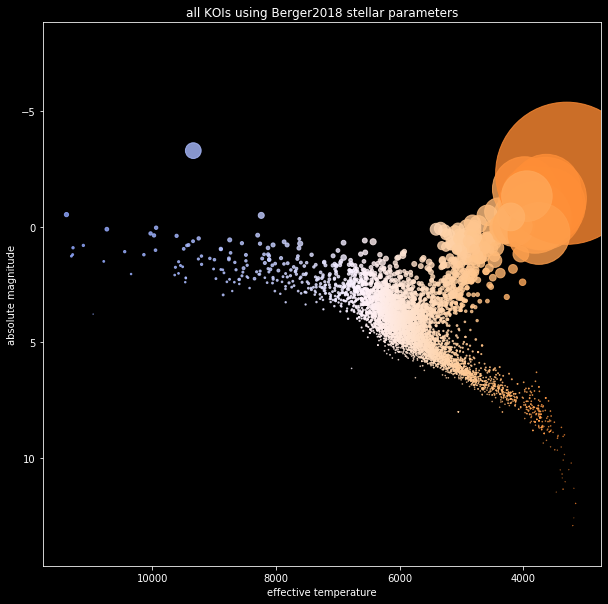

In [4]:

plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.Teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["R*"]**2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2018 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

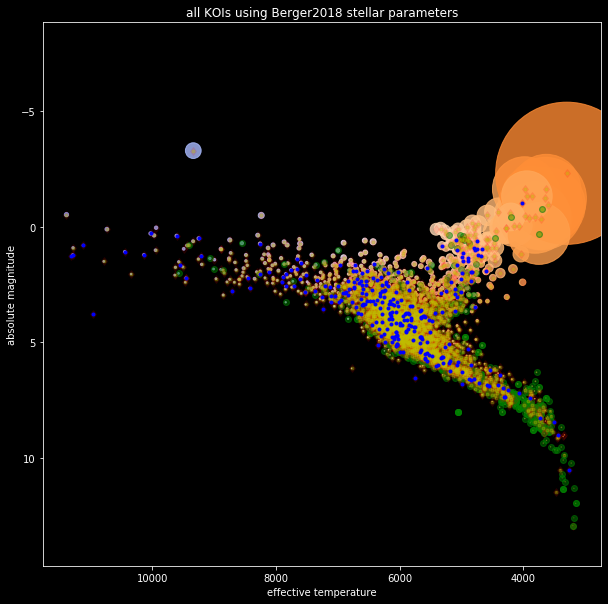

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.Teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["R*"]**2)
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
fp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
fpwgFp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "CERTIFIED FP"];
fpwgFa = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "CERTIFIED FA"];
plt.plot(pc.Teff, pc.absoluteKepmagBerger, 'o', c='g', alpha=0.5)
plt.plot(fp.Teff, fp.absoluteKepmagBerger, 'd', c='r', alpha=0.1)
plt.plot(fpwgFp.Teff, fpwgFp.absoluteKepmagBerger, '.', c='y', alpha=0.3)
plt.plot(fpwgFa.Teff, fpwgFa.absoluteKepmagBerger, '.', c='b', alpha=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2018 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

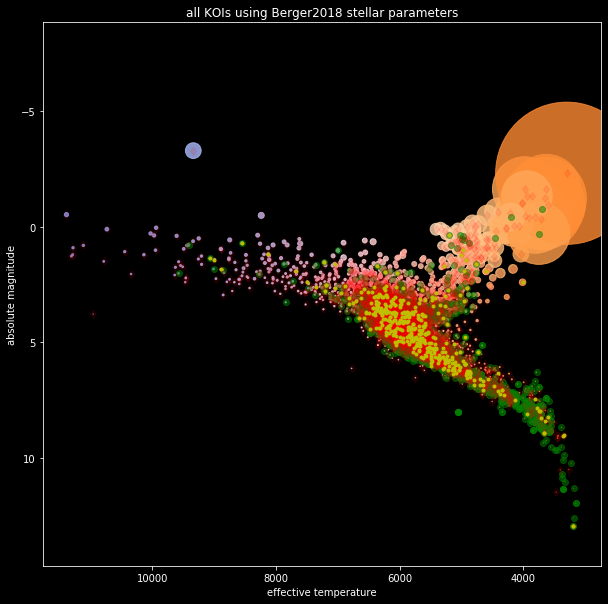

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.Teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["R*"]**2)
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
fp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
fpwgPp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET"];
plt.plot(pc.Teff, pc.absoluteKepmagBerger, 'o', c='g', alpha=0.5)
plt.plot(fp.Teff, fp.absoluteKepmagBerger, 'd', c='r', alpha=0.1)
plt.plot(fpwgPp.Teff, fpwgPp.absoluteKepmagBerger, '.', c='y', alpha=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2018 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

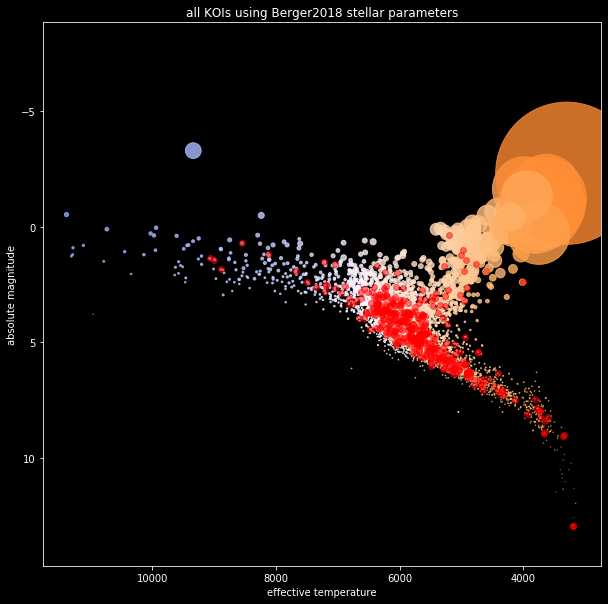

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(cfpTableBerger.Teff, cfpTableBerger.absoluteKepmagBerger, alpha=0.8, 
            c = np.transpose([cfpTableBerger["TeffR"],cfpTableBerger["TeffG"],cfpTableBerger["TeffB"]]), 
            s = cfpTableBerger["R*"]**2)
bigFp = cfpTableBerger[cfpTableBerger.koi_pdisposition == "FALSE POSITIVE"];
plt.plot(fpwgPp.Teff, fpwgPp.absoluteKepmagBerger, 'o', c='r', alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(xl)
plt.ylim(yl)
plt.title('all KOIs using Berger2018 stellar parameters');
plt.xlabel('effective temperature');
plt.ylabel('absolute magnitude');

In [8]:
list(cfpTableBerger)

['Unnamed: 0',
 'rowid',
 'kepoi_name',
 'fpwg_koi_period',
 'fpwg_disp_status',
 'fpwg_disp_source',
 'fpwg_disp_eb',
 'fpwg_disp_offst',
 'fpwg_disp_perep',
 'fpwg_disp_other',
 'fpwg_flux_ss',
 'fpwg_flux_slflum',
 'fpwg_flux_oedp',
 'fpwg_flux_vshape',
 'fpwg_flux_depth',
 'fpwg_flux_dilutn',
 'fpwg_flux_lcurve',
 'fpwg_flux_ootvar',
 'fpwg_flux_corvar',
 'fpwg_flux_other',
 'fpwg_flux_stellr',
 'fpwg_flux_noteb',
 'fpwg_offst_sig',
 'fpwg_offst_badim',
 'fpwg_offst_inval',
 'fpwg_offst_vis',
 'fpwg_offst_star',
 'fpwg_offst_qvars',
 'fpwg_offst_other',
 'fpwg_offst_nooff',
 'fpwg_perep_match',
 'fpwg_perep_direc',
 'fpwg_perep_col',
 'fpwg_perep_ghost',
 'fpwg_perep_video',
 'fpwg_perep_ref',
 'fpwg_fa_starvar',
 'fpwg_fa_unique',
 'fpwg_fa_thermal',
 'fpwg_fa_ntl',
 'fpwg_fa_artifact',
 'fpwg_fa_other',
 'fpwg_fa_notfa',
 'fpwg_fop_rvs1',
 'fpwg_fop_rvs2',
 'fpwg_fop_rvs3',
 'fpwg_fop_dblline',
 'fpwg_fop_imexam',
 'fpwg_fop_imblend',
 'fpwg_efp_public',
 'fpwg_efp_pubexam',
 'fp

/Users/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0, 0.5, 'Berger2018 planet radius')

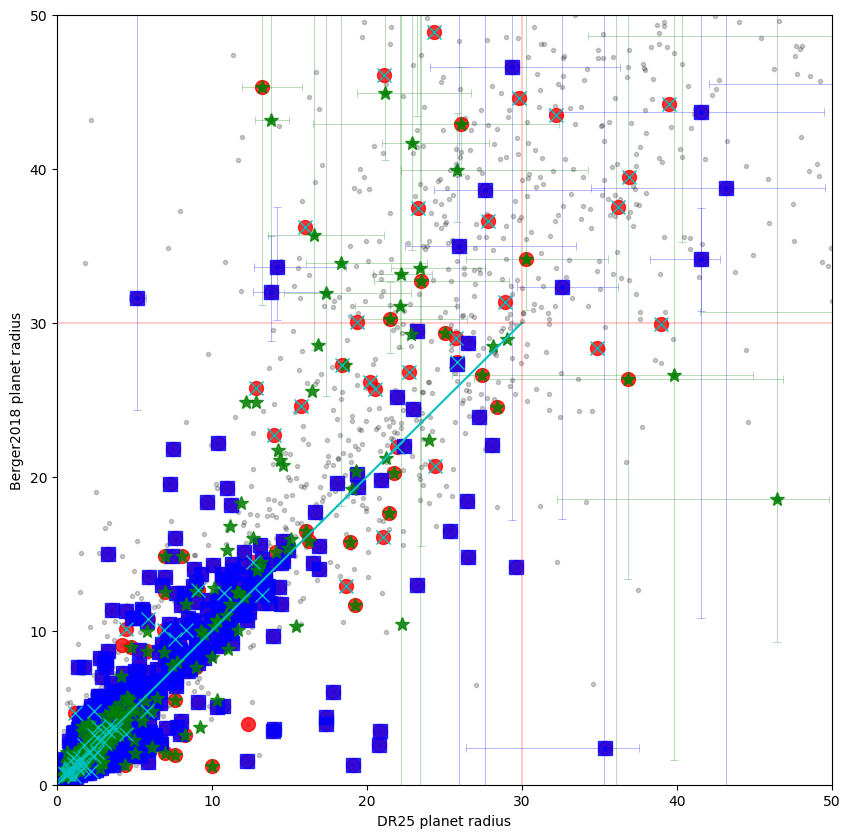

In [9]:
plt.style.use("default")
capsize = 3
elWidth = 0.4

plt.figure(figsize=(10,10))
fpwgPp = cfpTableBerger[cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET"];
pc = cfpTableBerger[cfpTableBerger.koi_pdisposition == "CANDIDATE"];
pcFP = pc[cfpTableBerger.fpwg_disp_status == "CERTIFIED FP"];
pcNotExamined = pc[cfpTableBerger.fpwg_disp_status == "NOT EXAMINED"];
plt.plot(cfpTableBerger.koi_prad, cfpTableBerger.corrected_prad, 'k.', alpha=0.2)
plt.plot(pc.koi_prad, pc.corrected_prad, 'ro', alpha=0.8, ms=10)
plt.plot(pcNotExamined.koi_prad, pcNotExamined.corrected_prad, 'bs', alpha=0.8, ms=10)
plt.plot(fpwgPp.koi_prad, fpwgPp.corrected_prad, 'g*', alpha=0.8, ms=10)
plt.plot(pcFP.koi_prad, pcFP.corrected_prad, 'cx', alpha=1, ms=10)

largePcNotExamined = pcNotExamined[(pcNotExamined.koi_prad > 30) | (pcNotExamined.corrected_prad > 30)];
plt.errorbar(largePcNotExamined.koi_prad, largePcNotExamined.corrected_prad, 
             xerr = np.vstack((-largePcNotExamined.koi_prad_err1, largePcNotExamined.koi_prad_err2)),
             yerr = np.vstack((-largePcNotExamined.corrected_prad_err1, largePcNotExamined.corrected_prad_err2)),             
            fmt = 'b.', elinewidth = elWidth, capsize = capsize, capthick = elWidth, alpha = 0.5)

largeFpwgPp = fpwgPp[(fpwgPp.koi_prad > 30) | (fpwgPp.corrected_prad > 30)];
plt.errorbar(largeFpwgPp.koi_prad, largeFpwgPp.corrected_prad, 
             xerr = np.vstack((-largeFpwgPp.koi_prad_err1, largeFpwgPp.koi_prad_err2)),
             yerr = np.vstack((-largeFpwgPp.corrected_prad_err1, largeFpwgPp.corrected_prad_err2)),             
            fmt = 'g.', elinewidth = elWidth, capsize = capsize, capthick = elWidth, alpha = 0.5)


plt.plot([0,30], [0,30], 'c')
plt.plot([0,50], [30,30], 'r', alpha=0.2)
plt.plot([30,30], [0,50], 'r', alpha=0.2)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("DR25 planet radius")
plt.ylabel("Berger2018 planet radius")

In [10]:
ppGotBig = (cfpTableBerger.fpwg_disp_status == "POSSIBLE PLANET") \
    & (fpwgPp.koi_prad < 30) & (fpwgPp.corrected_prad > 30)
fpwgPp = cfpTableBerger[ppGotBig];


In [11]:
fpwgPp

,Unnamed: 0,rowid,kepoi_name,fpwg_koi_period,fpwg_disp_status,fpwg_disp_source,fpwg_disp_eb,fpwg_disp_offst,fpwg_disp_perep,fpwg_disp_other,...,absoluteKepmagBerger,TeffR,TeffG,TeffB,radiusBerger,radiusBerger_err1,radiusBerger_err2,corrected_prad,corrected_prad_err1,corrected_prad_err2
603,603,841,K02141.01,1.31,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,3.308145,1.000000,0.911388,0.872556,1.894,0.147,-0.134,33.904224,1405.381414,-15.787136
839,839,1152,K00185.01,23.21,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,3.683731,1.000000,0.891505,0.820230,1.710,0.136,-0.123,44.897721,5.098635,-4.344967
1059,1059,1436,K04056.01,3.95,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,4.586644,1.000000,0.861574,0.745608,1.247,0.095,-0.086,32.677334,915.549561,-17.179726
2114,2114,2933,K04632.01,40.07,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,3.164883,1.000000,0.852124,0.723045,2.601,0.327,-0.280,45.313327,1926.284969,-14.155730
2561,2561,3536,K05308.01,9.94,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,5.022237,1.000000,0.828204,0.667876,1.181,0.090,-0.081,31.100336,30.495523,-2.756224
2857,2857,3918,K00871.01,12.94,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,4.063379,1.000000,0.890203,0.816898,1.466,0.131,-0.118,41.656939,18.413042,-6.923425
3635,3635,4952,K01549.01,29.48,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,3.795582,1.000000,0.866062,0.756479,1.933,0.174,-0.157,35.705808,16.586060,-7.460062
3896,3896,5315,K03761.01,164.96,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,1.204014,1.000000,0.799780,0.605740,8.281,1.704,-1.302,140.383108,28.973413,-22.510628
3909,3909,5333,K02680.01,14.41,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,5.072841,1.000000,0.847548,0.712265,1.042,0.080,-0.072,33.560821,8062.688589,-195.902530
4181,4181,5705,K01251.01,0.58,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,...,3.316639,1.000000,0.873118,0.773831,2.217,0.237,-0.208,63.244128,97.512619,-19.845752
